### DESCRIPTION/INTRODUCTION
The Dataset we are about to work on consist of patient information based on the diagnostic measurement carried out on the patient. The dataset was gotten from the National Institutes of Diabetics and Kidney Diseases. All the patient in the dataset are female atleast 21year old originating Pima India heritage

### PROBLEM STATEMENT
The objective of this study is to develop a predictive model that can accurately determine the likekihood of an individual having diabetes based on their medical history and other given variables

### PARAMETER
The parameter includes medical predictor variables and the outcome(targe)

The Medical predictor variables are;

Pregnancies- number of times the patient got pregnant

Blood Pressure- The patient diastolic blood pressure measured in mmHg

BMI- Body Mass Index

Skin Thickness- Trice skpin fold thickness measured in mm

Insulin- 2hours serum insulin

Diabetes Pedigree Function-

Age- The patient age

The outcomes are in numerical variables of 0s and 1s. The 1s indicate yes while the 0s indicate No.

### IMPORT THE RELEVANT

In [56]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno

# Data visualisation
import seaborn as sns
sns.set
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

### LOAD THE DATA

In [57]:
# before loading the data we will locate the directory
import os

In [58]:
os.getcwd()

'C:\\Users\\HP\\Downloads'

In [59]:
# change the directory to that of the downloads
os.chdir('C:\\Users\\HP\Downloads')

In [60]:
# now we load the data
data = pd.read_csv('diabetes.csv')

In [61]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### From the above data we have 768 rows and 9 columns

In [62]:
# we will be getting the info of the data as well as the number of missing values of each variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### From the above information there no report of missing value, all variable are in numeric data from the data provided. 

In [63]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [64]:
# lets get the column titles
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [65]:
# checking for the total missing values 

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### thereare no missing values but there are columns having values as zeros which is not suppose to be. we will fill them with mean or median. First let check the numbers of zeros in each columns such as Glucose, Blood Pressure, Skin Thickness, Insulin and BMI. other column can have zeros apart from the listed columns.

In [66]:
(data['Glucose'] == 0).sum()

5

In [67]:
(data['BloodPressure'] == 0).sum()

35

In [68]:
(data['SkinThickness'] == 0).sum()

227

In [69]:
(data['Insulin'] == 0).sum()

374

In [70]:
(data['BMI'] == 0).sum()

11

In [71]:
# It is very important to have a  copy of our dataset
data_new = data.copy()

In [72]:
# we will be creating a list for the numbers of columns we want to work on
column_list = ['Glucose', 'Insulin', 'BloodPressure', 'SkinThickness', 'BMI']

In [73]:
# using the column list created, we shall be replacing the zeros to mean. 
data_new[column_list]=data_new[column_list].replace(0, data_new[column_list][data_new[column_list] !=0].mean())

In [74]:
# after replacing the mean, the values might appear in float type so we convert them to integer type
data_new[column_list]=data_new[column_list].astype(int)

In [75]:
data_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155,33,0.627,50,1
1,1,85,66,29,155,26,0.351,31,0
2,8,183,64,29,155,23,0.672,32,1
3,1,89,66,23,94,28,0.167,21,0
4,0,137,40,35,168,43,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32,0.171,63,0
764,2,122,70,27,155,36,0.340,27,0
765,5,121,72,23,112,26,0.245,30,0
766,1,126,60,29,155,30,0.349,47,1


#### The next step we will go into is visualizing the datasets

### DATA VISUALIZATION

A dataframe is made up of rows and columns. Number of rows correspond to the number of observations in our dataset whereas columns, sometimes called features, represent characteristics that help describe these observations. In our dataset, rows are the patients whereas columns are the features that describe the patients like their pregnancies, glucose, etc.



<AxesSubplot:>

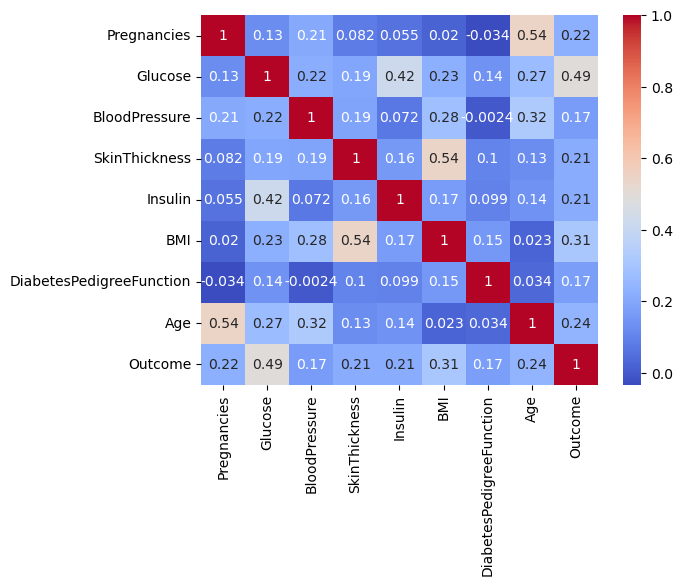

In [76]:
#now let check the correlation matrix of the variables
#HEATMAT - CORRELATION MATRIX

sns.heatmap(data_new.corr(), annot=True, cmap='coolwarm')

From the above diagram, Glucose, BMI, Age and Pregnancies are correlated with the outcome

### The code below generates histograms to visualize the distribution of various features in the DataFrame 'data_new'. Each histogram is created using the seaborn library's 'histplot' function. The features being plotted include 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome' .
NOTE: The 'kde=False' argument indicates that the kernel density estimation plot should not be included

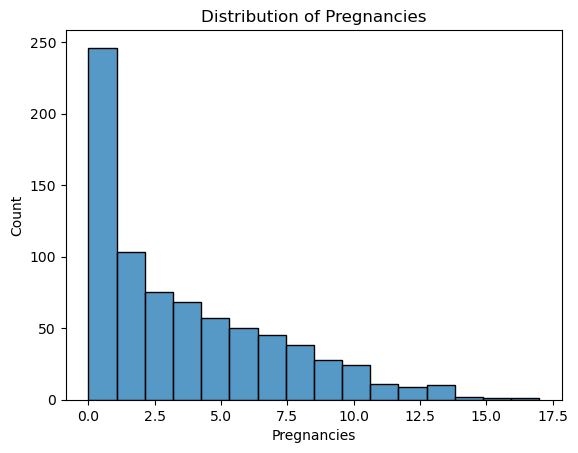

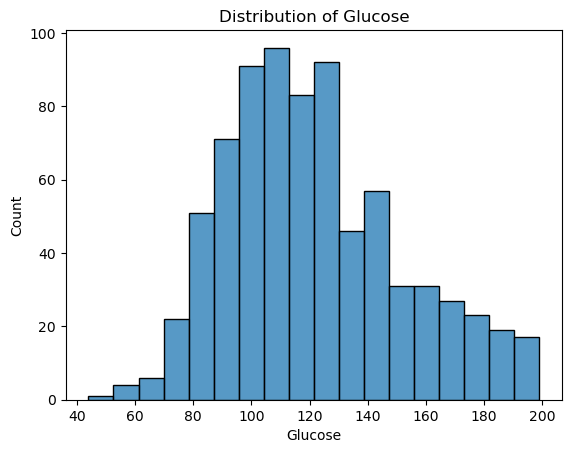

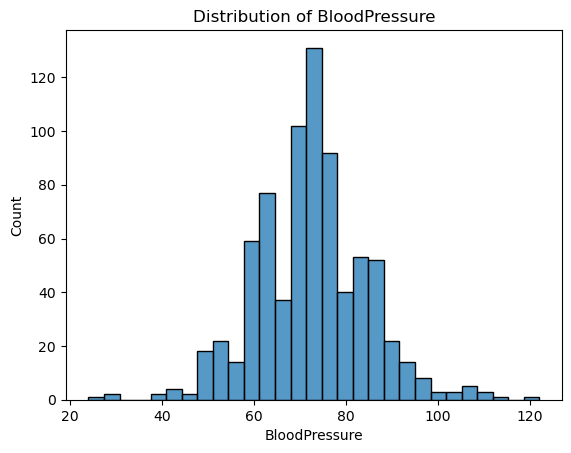

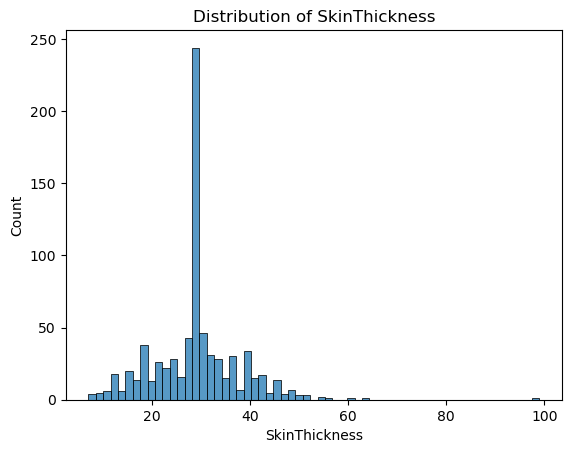

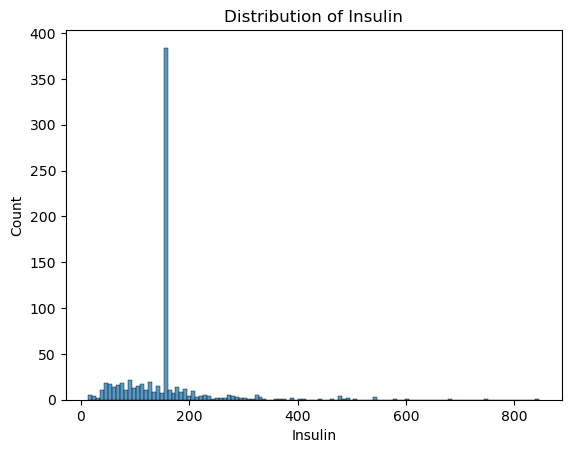

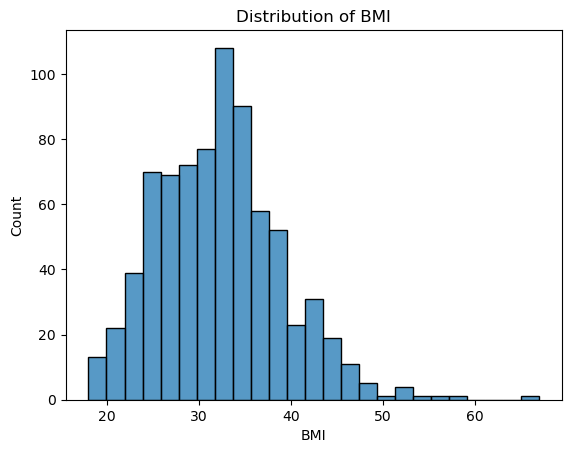

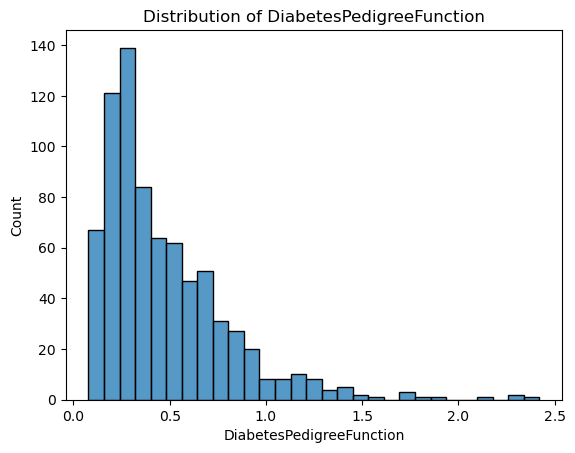

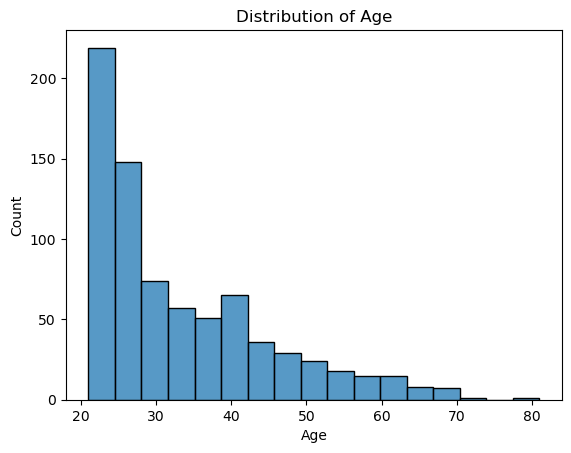

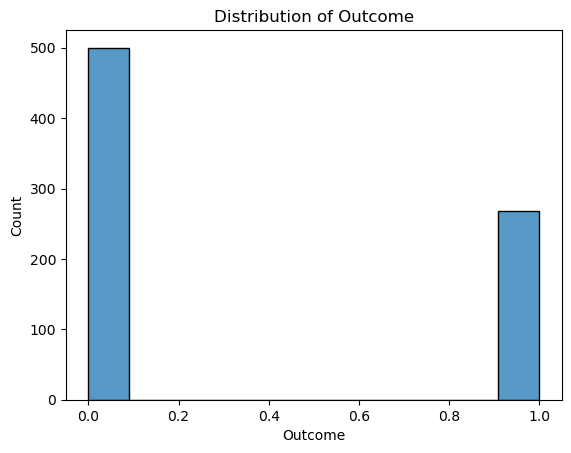

In [77]:
sns.histplot(data_new['Pregnancies'], kde=False)
plt.title("Distribution of Pregnancies")
plt.show()

sns.histplot(data_new['Glucose'], kde=False)
plt.title("Distribution of Glucose")
plt.show()

sns.histplot(data_new['BloodPressure'], kde=False)
plt.title("Distribution of BloodPressure")
plt.show()

sns.histplot(data_new['SkinThickness'], kde=False)
plt.title("Distribution of SkinThickness")
plt.show()

sns.histplot(data_new['Insulin'], kde=False)
plt.title("Distribution of Insulin")
plt.show()

sns.histplot(data_new['BMI'], kde=False)
plt.title("Distribution of BMI")
plt.show()

sns.histplot(data_new['DiabetesPedigreeFunction'], kde=False)
plt.title("Distribution of DiabetesPedigreeFunction")
plt.show()

sns.histplot(data_new['Age'], kde=False)
plt.title("Distribution of Age")
plt.show()

sns.histplot(data_new['Outcome'], kde=False)
plt.title("Distribution of Outcome")
plt.show()

The graph above shows the count of each variables with respect to the patients data. 

In [78]:
# Value counts of the Outcome column 

data_new['Outcome'].value_counts(dropna = False)

0    500
1    268
Name: Outcome, dtype: int64

In [79]:
# Mean of Pregnancies by Outcome

data_new[['Pregnancies', 'Outcome']].groupby('Pregnancies', as_index = False).mean().sort_values(by = 'Outcome', ascending = False)

,Pregnancies,Outcome
16,17,1.000000
15,15,1.000000
14,14,1.000000
9,9,0.642857
11,11,0.636364
8,8,0.578947
7,7,0.555556
13,13,0.500000
12,12,0.444444
10,10,0.416667


The dataset above shows the likelihood of having diabetes based of the number of times the patient have gotten pregnant

Let us represent the mean data for pregnancies in barplot

Text(0.5, 1.0, 'Outcome Probability by Pregnancies')

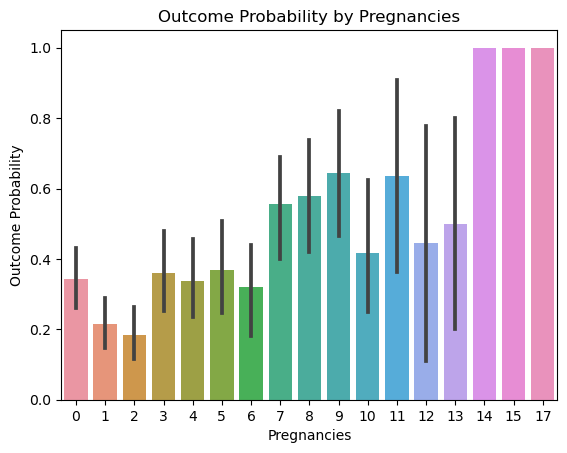

In [80]:
sns.barplot(x = 'Pregnancies', y ='Outcome', data = data_new)
plt.ylabel('Outcome Probability')
plt.title('Outcome Probability by Pregnancies')

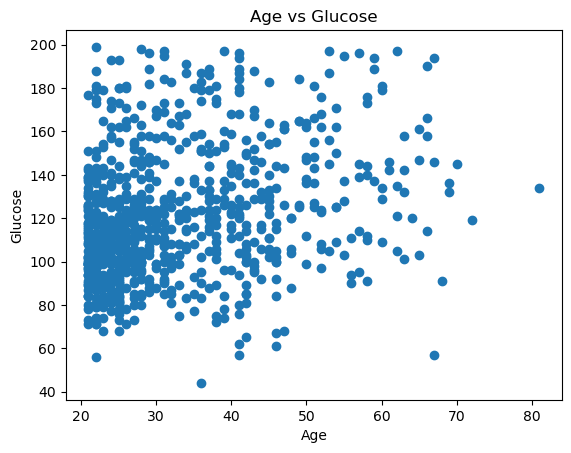

In [81]:
# let us use scatter plot to analyze the relationship between Glucose and Age
plt.scatter(data_new['Age'], data_new['Glucose'])
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Age vs Glucose')
plt.show()

The above diagram shows the relationship between age and glucose level in a patient. we can look at the diagram and see that patients from the age of 20 to 50 are much in the dataset

### MODELLING

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

We need to first split our training data into independent variables or predictor variables, represented by X as well as dependent variable or response variable, represented by Y.

Y_train is the Outcome column in our training set and X_train is the other columns in the training set excluding the Outcome column. Our models will learn to classify Outcome, Y_train based on all X_train and make predictions on X_test.

In [82]:
# for training the data we should import the train test split 
from sklearn.model_selection import train_test_split

#now let split the data
X = data_new.drop('Outcome', axis=1)
y = data_new["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.2, random_state=42)

## Fit model to data and make predictions
This requires 3 simple steps: instantiate the model, fit the model to the training set and predict the data in test set.

I have chosen the following classifiers for the job:

Logistic regression

Support vector machines

K-nearest neighbours

Gaussian naive bayes

Perceptron

Linear SVC

Stochastic gradient descent

Decision tree

Random forest

CatBoost

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their accuracy at making predictions. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.

### LOGISTIC REGRESSION

In [83]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

73.2

### SUPPORT VECTOR MACHINE

In [84]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) *100,2)
acc_svc

74.51

### KNEAREST NEIGHBORS CLASSIFIER

In [85]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

78.43

### GUSSIAN NAIVES BAYES

In [86]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train)*100,2)
acc_gaussian

71.9

### PERCEPTRON

In [87]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train)*100,2)
acc_perceptron

55.56

### LINEAR SVC

In [88]:
linearsvc = LinearSVC()
linearsvc.fit(X_train, y_train)
Y_pred = linearsvc.predict(X_test)
acc_linearsvc = round(linearsvc.score(X_train, y_train)*100,2)
acc_linearsvc

65.36

### STOCHASTIC GRADIENT DESCENT

In [89]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train)*100,2)
acc_sgd

69.93

### DECISION TREE

In [90]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train)*100,2)
acc_decision_tree

100.0

### RANDOM FOREST

In [91]:
random_forest = RandomForestClassifier(n_estimators = 5)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train,y_train)*100,2)
acc_random_forest

96.73

### CATBOOST

In [92]:
catboost = CatBoostClassifier()
catboost.fit(X_train, y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, y_train) * 100, 2)
acc_catboost

Learning rate set to 0.004622
0:	learn: 0.6910053	total: 21.8ms	remaining: 21.7s
1:	learn: 0.6884951	total: 27.2ms	remaining: 13.6s
2:	learn: 0.6860264	total: 31.9ms	remaining: 10.6s
3:	learn: 0.6834770	total: 36.6ms	remaining: 9.12s
4:	learn: 0.6810822	total: 41.6ms	remaining: 8.28s
5:	learn: 0.6790299	total: 45.1ms	remaining: 7.47s
6:	learn: 0.6764261	total: 48.6ms	remaining: 6.89s
7:	learn: 0.6740135	total: 52ms	remaining: 6.45s
8:	learn: 0.6719628	total: 55.4ms	remaining: 6.11s
9:	learn: 0.6692837	total: 58.8ms	remaining: 5.82s
10:	learn: 0.6676077	total: 61.1ms	remaining: 5.49s
11:	learn: 0.6651493	total: 65.1ms	remaining: 5.36s
12:	learn: 0.6631957	total: 68.6ms	remaining: 5.2s
13:	learn: 0.6609447	total: 72.1ms	remaining: 5.08s
14:	learn: 0.6587610	total: 76.8ms	remaining: 5.04s
15:	learn: 0.6569324	total: 80.6ms	remaining: 4.96s
16:	learn: 0.6548302	total: 84.1ms	remaining: 4.86s
17:	learn: 0.6524294	total: 87.5ms	remaining: 4.77s
18:	learn: 0.6507642	total: 91.1ms	remaining: 4

100.0

### Model evaluation and hyperparameter tuning
Once all our models have been trained, the next step is to assess the performance of these models and select the one which has the highest prediction accuracy.

### Training accuracy
Training accuracy shows how well our model has learned from the training set.

In [93]:
models = pd.DataFrame({'Model': ['Support Vector Machine', 'KNN', 'Logistic Regression',
                                 'CatBoost', 'Random Forest', 'Stochastic Gradient Decent', 'Decision Tree', 
                                 'Linear SVC', 'Gaussian Naives Bayes', 'Perceptron'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_catboost, acc_random_forest, acc_sgd,
                                 acc_decision_tree, acc_linearsvc, acc_gaussian, acc_perceptron]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,CatBoost,100.00
1,Decision Tree,100.00
2,Random Forest,96.73
3,KNN,78.43
4,Support Vector Machine,74.51
5,Logistic Regression,73.20
6,Gaussian Naives Bayes,71.90
7,Stochastic Gradient Decent,69.93
8,Linear SVC,65.36
9,Perceptron,55.56


### K-fold cross validation
It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. cross validation remove the stress on seleccting which data to use as a test dataset or training dataset. we get to use 20% for testing and 80% for training but we dont whcih data was picked for 20% or 80%. This is where we employ the Cross Validation

the cross validaation will pick the best classifier for our model, we have used 10 classifier

In [94]:
# first we start by Creating a list which contains classifiers used by us

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [95]:
# Create a list which contains cross validation results for each classifier using for loop
# cv means cross validation

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.004409
0:	learn: 0.6905675	total: 5.48ms	remaining: 5.48s
1:	learn: 0.6875243	total: 8.91ms	remaining: 4.45s
2:	learn: 0.6846691	total: 12.2ms	remaining: 4.05s
3:	learn: 0.6818607	total: 15.5ms	remaining: 3.85s
4:	learn: 0.6795311	total: 18.8ms	remaining: 3.75s
5:	learn: 0.6766537	total: 22.1ms	remaining: 3.66s
6:	learn: 0.6743494	total: 25.4ms	remaining: 3.6s
7:	learn: 0.6717158	total: 28.8ms	remaining: 3.57s
8:	learn: 0.6700565	total: 32.1ms	remaining: 3.54s
9:	learn: 0.6673972	total: 35.5ms	remaining: 3.51s
10:	learn: 0.6653857	total: 37.7ms	remaining: 3.39s
11:	learn: 0.6624736	total: 41ms	remaining: 3.38s
12:	learn: 0.6606861	total: 44.3ms	remaining: 3.36s
13:	learn: 0.6578296	total: 47.6ms	remaining: 3.35s
14:	learn: 0.6555053	total: 50.9ms	remaining: 3.35s
15:	learn: 0.6535460	total: 54.3ms	remaining: 3.34s
16:	learn: 0.6510429	total: 57.6ms	remaining: 3.33s
17:	learn: 0.6480988	total: 60.8ms	remaining: 3.32s
18:	learn: 0.6462227	total: 64.2ms	remaining: 3

In [96]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [97]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.720417,0.111888,Logistic Regression
1,0.718333,0.125985,CatBoost
2,0.705833,0.136832,Random Forest
3,0.700000,0.116622,Support Vector Machines
4,0.699583,0.125920,KNN
5,0.693333,0.078929,Gausian Naive Bayes
6,0.667917,0.113545,Decision Tree
7,0.607500,0.059826,Perceptron
8,0.588333,0.074531,Stochastic Gradient Descent
9,0.555417,0.121536,Linear SVC


The above diagram shows the algorithms with the highest mean and standard deviation respectively

Text(0.5, 1.0, 'Cross Validation Scores')

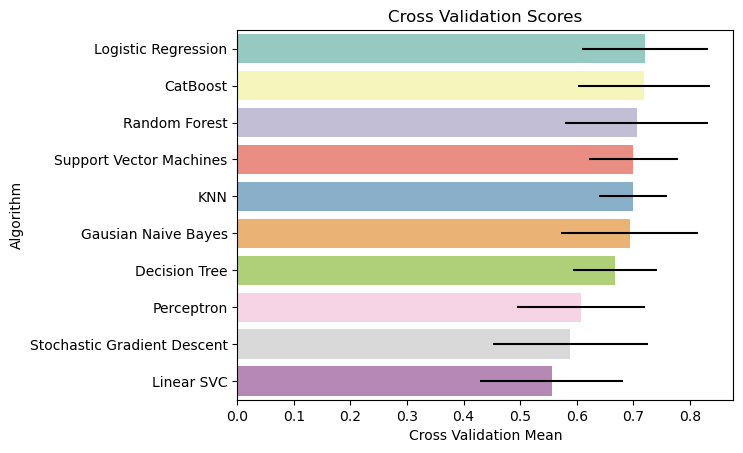

In [98]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

As we can see, Random Forest has the highest cross validation mean and thus we will proceed with this model.

### Hyperparameter tuning for Random Forest
Hyperparameter tuning is the process of tuning the parameters of a model. Here I will tune the parameters of Random Forest using GridSearchCV

In [99]:
from sklearn.datasets import make_classification

In [100]:
X_train, y_train = make_classification(n_samples=1000, n_features=20)

In [101]:
rf = RandomForestClassifier()

In [102]:
# let define the hyperparameter grid
param_grid = {'n_estimators':[100, 300, 500],
              'max_depth':[None, 10, 20],
              'min_samples_split': [2,5,10],
              'min_samples_leaf':[1.2,4],
              'max_features':['auto', 'sqrt']
             }

In [103]:
# let us use GridSearchCV to find the best parameter
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1.2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]})

In [104]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
Best Score: 0.954


In [105]:
# training the classifier accuracy
best_rf = RandomForestClassifier(**best_params)
accuracy_scores = cross_val_score(best_rf, X_train, y_train, cv=5)

In [106]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy scores:", accuracy_scores)
print("Mean Accuracy:", accuracy_scores.mean())

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
Best Score: 0.954
Accuracy scores: [0.95  0.94  0.955 0.96  0.96 ]
Mean Accuracy: 0.953


In [107]:
# Mean cross validation score

cross_val_score(svc, X_train, y_train, scoring = 'accuracy', cv = 10).mean()

0.9410000000000001

In [108]:
# let us check the y_pred variable

Y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [109]:
#lrt us check the number of observations on the dependent variable Y
len(Y_pred)

615

In [110]:
#now let us compare between the actual Outcome and predicted result
#we will be using the code below to create a dataframe on Outcome and predicted result

pd.DataFrame({'Outcome': y_test, 'Predicted Result':Y_pred})

,Outcome,Predicted Result
668,0,1
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
224,0,0
729,0,0
630,1,0
472,0,0


### CONCLUSION
1. from the dataset, out of the given 768 patients, only 268 patients were diagnosed of diabetes

2. increased level of Glucose and insulin will increase the chance of having diabetes

3. Patient with high blood pressure have greater chance of diabetes. Diabetes and high blood pressure commonly co-exist. In fact, a person with diabetes is twice as likely to have high blood pressure as someone who is diabetes free

4. Patient with multiple pregnancies can have diabetes. The risk of developing gestational diabetes is generally higher in people carrying twins or multiples than those carrying a single fetus. This is because carrying multiple babies places additional stress on the body and increases the demand for insulin. The risk may also be higher due to increased placental hormones